In [8]:
import numpy as np
from scipy.io.wavfile import read

# 读取wav文件，得到采样率和数据
sample_rate, data = read('C:\\Users\\88486\\Desktop\\WorkSpace\\Python\\通信原理\\suno.wav') #windows路径
print(sample_rate,data)
# 创建载波信号
time = np.arange(len(data))/float(sample_rate)#载波时间
carrier_freq=sample_rate*2#载波频率


48000 [[-30 -37]
 [-42 -50]
 [-35 -42]
 ...
 [-31 -40]
 [-37 -46]
 [-30 -37]]


In [10]:
carrier = np.cos(2.0 * np.pi * carrier_freq * time)#产生载波信号
modulated_data = np.empty_like(data)
modulated_data[:, 0] = carrier * data[:, 0]#左声道调制
modulated_data[:, 1] = carrier * data[:, 1]#右声道调制


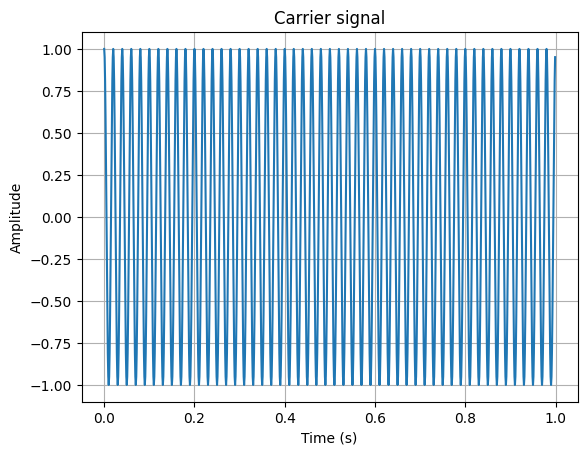

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
sample_rate = 1000 # 采样率
carrier_freq = 50 # 载波频率
time = np.arange(0, 1, 1/sample_rate) # 时间数组

# 生成载波信号
carrier = np.cos(2 * np.pi * carrier_freq * time)

# 绘制载波信号
plt.figure()
plt.plot(time, carrier)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal')
plt.grid(True)
plt.show()